# Floating Wave with Fixed Layout Scenario Example

In [1]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [2]:
%run floating_wave_fixed_layout_scenario.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\floating_wave_fixed_layout_scenario.pkl


In [3]:
from IPython.display import display, HTML

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [5]:
import numpy as np
from datetime import datetime

In [6]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.strategy import StrategyManager

In [7]:
# Bring up the logger
start_logging()

2016-10-25 12:57:09,500 - INFO - dtocean_core - Begin logging for dtocean_core.


In [8]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [9]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [10]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-10-25 12:57:13,836 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-10-25 12:57:13,836 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-10-25 12:57:13,836 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [11]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Floating")
my_var.read(new_core, new_project)

2016-10-25 12:57:13,882 - INFO - aneris.control.data - New "device.system_type" data stored with index JV4OYU
2016-10-25 12:57:13,882 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [12]:
project_menu.initiate_pipeline(new_core, new_project)

2016-10-25 12:57:13,898 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-10-25 12:57:13,898 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index KY6MI1
2016-10-25 12:57:13,898 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-10-25 12:57:13,914 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-10-25 12:57:13,914 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [13]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [14]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')


## Activate the Economics and Reliability themes

In [15]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [16]:
theme_menu.activate(new_core, new_project, "Economics")

In [17]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [18]:
project_menu.initiate_dataflow(new_core, new_project)

2016-10-25 12:57:14,085 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index 38ZRZU
2016-10-25 12:57:14,085 - INFO - aneris.control.simulation - Datastate stored
2016-10-25 12:57:14,132 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [19]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")

## Load test data

In [20]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "floating_wave_fixed_layout_scenario.pkl")

2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "farm.wave_series" data stored with index EYHY3B
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index VV187U
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index 2YIJ0I
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.minimum_distance_x" data stored with index 1MM9KH
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.minimum_distance_y" data stored with index IR5MJK
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.installation_depth_min" data stored with index FPWF6M
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "device.wave_data_directory" data stored with index 8SU6SX
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "site.lease_boundary" data stored with index 3OM5PE
2016-10-25 12:57:14,305 - INFO - aneris.control.data - New "options.opt

In [21]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "floating_wave_fixed_layout_scenario.pkl")

2016-10-25 12:57:14,539 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index U1YZH2
2016-10-25 12:57:14,539 - INFO - aneris.control.data - New "component.power_quality" data stored with index 1IYKEZ
2016-10-25 12:57:14,539 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index XOR9XE
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "component.switchgear" data stored with index 8NKNX3
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "component.collection_points" data stored with index HPEPZ2
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index QPYM13
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "device.voltage" data stored with index DR08G3
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "farm.shipping_hist" data stored with index I14IDI
2016-10-25 12:57:14,553 - INFO - aneris.control.data - New "corridor.max_seabed_tem

In [22]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "floating_wave_fixed_layout_scenario.pkl")

2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "device.depth_variation_permitted" data stored with index 36LHRF
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "device.foundation_location" data stored with index 69KPXF
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "farm.mean_wind_speed_100_year" data stored with index SZZOB3
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "device.system_profile" data stored with index Q3399A
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "farm.mooring_ULS_safety_factor" data stored with index GJ8YRO
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "constants.rectangular_current_drag" data stored with index 8NTYR6
2016-10-25 12:57:14,928 - INFO - aneris.control.data - New "constants.gravity" data stored with index 0066HM
2016-10-25 12:57:14,944 - INFO - aneris.control.data - New "device.dry_beam_area" data stored with index VSE8K6
2016-10-25 12:57:14,944 - INFO - aneris.control.data - 

## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [23]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [24]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [25]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [26]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate, device cost and project lifetime

In [27]:
discount_rate = 0.05
device_cost = 1000000

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

2016-10-25 12:57:15,224 - INFO - aneris.control.data - New "project.discount_rate" data stored with index SOWWTP
2016-10-25 12:57:15,224 - INFO - aneris.control.simulation - Datastate stored
2016-10-25 12:57:15,256 - INFO - aneris.control.data - New "device.system_cost" data stored with index 5F3H3B
2016-10-25 12:57:15,256 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [28]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Mooring and Foundations')
display(can_execute)

input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [29]:
strategy_manager = StrategyManager()

In [30]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [31]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-10-25 12:57:15,381 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-10-25 12:57:15,520 - WARNING - dtocean_hydro.input - [Warning] The wave module cannot run with variable bathymetry
The bathymetry is reduced to its average value.
2016-10-25 12:57:15,520 - INFO - dtocean_hydro.input - The averge bathymetry value is -80.0 m
2016-10-25 12:57:16,332 - WARNING - dtocean_hydro.input - The rated power specified (0.3 W) is smaller than the rated power calculated from the machine data (2330590.00651 W) This situation can lead to unexpected/unrealistic high yield.
2016-10-25 12:57:16,332 - WARNING - dtocean_hydro.input - ('The range of Wave Periods specified in the machine power matrix', 'does not cover the given site', 'Due to the model linearity, this situation can bring unexpected/unrealistic results')
2016-10-25 12:57:16,332 - WARNING - dtocean_hydro.input - ('

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [32]:
hydro_branch.inspect(new_core, new_project)

2016-10-25 13:15:12,359 - INFO - dtocean_core.core - Inspecting level hydrodynamics output


In [33]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [34]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [35]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'device001': <shapely.geometry.point.Point at 0x1187cdd8>,
 'device002': <shapely.geometry.point.Point at 0x11aca080>,
 'device003': <shapely.geometry.point.Point at 0x11873e80>,
 'device004': <shapely.geometry.point.Point at 0x1187c240>,
 'device005': <shapely.geometry.point.Point at 0x1187c400>}

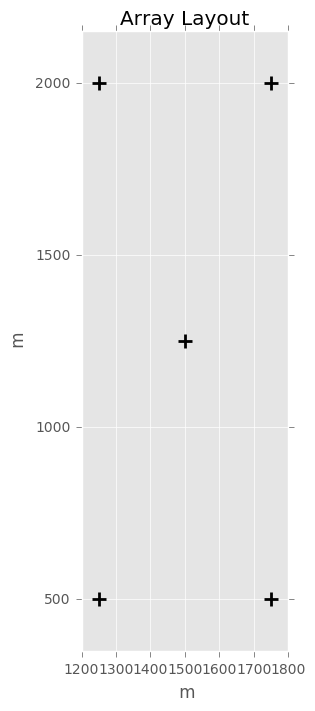

In [36]:
layout.plot(new_core, new_project)

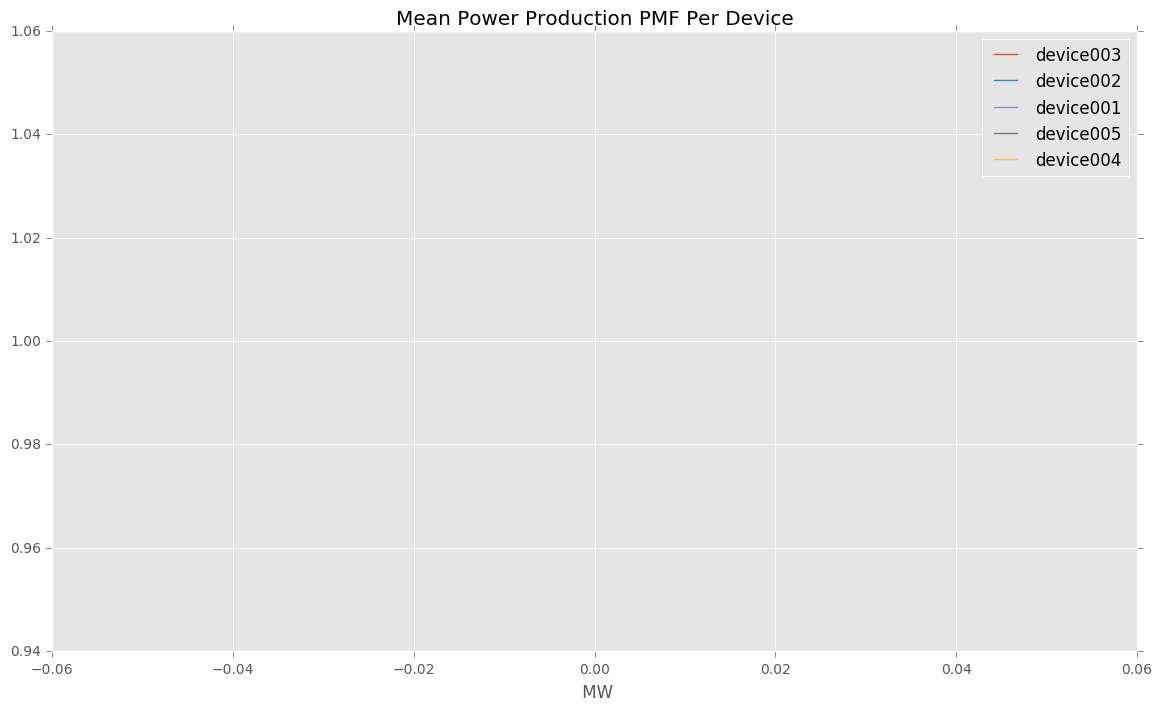

In [37]:
power_pmf = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_pmf_per_device")
power_pmf.plot(new_core, new_project)
power_pmf_value = power_pmf.get_value(new_core, new_project)

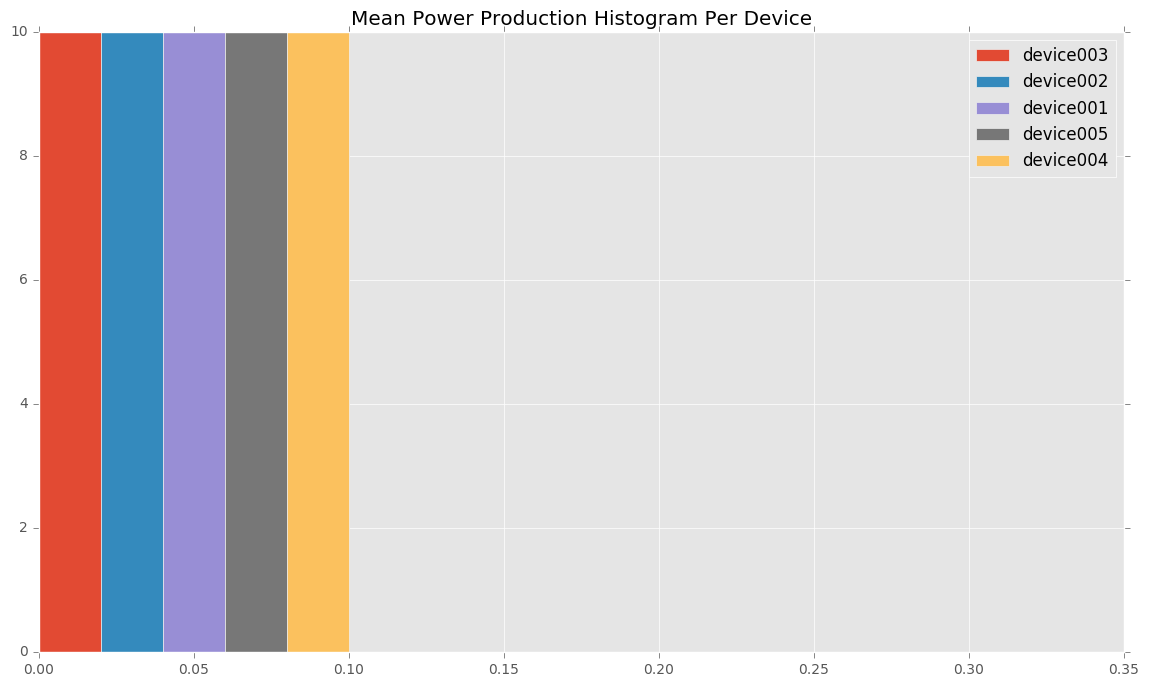

In [38]:
power_hist = electro_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [39]:
electro_branch.inspect(new_core, new_project)

2016-10-25 13:15:13,217 - INFO - dtocean_core.core - Inspecting level electrical sub systems output


In [40]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [41]:
farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [42]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [43]:
cost_data

,Key Identifier,Cost,Quantity,Year
0,17,800.0,1300.000000,0
1,2,700.0,2200.000000,0
2,12,150000.0,1.000000,0
3,6,200000.0,14.000000,0
4,id742,800.0,20862.090962,0
5,None,1000000.0,1.000000,0


In [44]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")
if substations.has_value(new_core, new_project): substations.get_value(new_core, new_project)

In [45]:
umbilical = electro_branch.get_output_variable(new_core, new_project,
                                               "device.umbilical_type")
umbilical.get_value(new_core, new_project)

'id742'

## Examine the Mooring and Foundations results

Lets see what outputs are available from the modules.

In [46]:
moorings_branch.inspect(new_core, new_project)

2016-10-25 13:15:13,326 - INFO - dtocean_core.core - Inspecting level mooring and foundations output


In [47]:
output_status = moorings_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine Economics Results

In [48]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [49]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")

In [50]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_energy)
HTML(message)

ValueError: Variable ID "project.lcoe" is not contained in the active data state.

## Plot the balance of CAPEX costs

In [ ]:
# The slices will be ordered and plotted counter-clockwise.
cost_data = cost_breakdown.get_value(new_core, new_project)
labels = cost_data.keys()
sizes = cost_data.values()
metadata = cost_breakdown.get_metadata(new_core)
colors = ['lightblue', 'hotpink']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title(metadata.title)

plt.show()

# HTML in matplotlib?

In [ ]:
msg = html_dict(cost_data)
HTML(msg)

In [ ]:
var_value = new_core.get_data_value(new_project, "device.system_mass")
var_value

In [ ]:
test = new_core.get_data_value(new_project, "farm.umbilical_seabed_connection")

pretty_dict = {}

for dev, point in test.iteritems():
    pretty_dict[dev] = list(point.coords)[0]

message = html_dict(pretty_dict)
HTML(message)